In [287]:
# Coded by Carlos Goes (Instituto Mercado Popular)

# This do file aims at
# 1. generating stationary and non-stationary data
# 2. providing examples of spurious regressions

# Import packages

import numpy as np
import matplotlib.pyplot as plt

# Define length of time series

tlength = 10000

# Define number of non-stationary series to be created

wide = 5

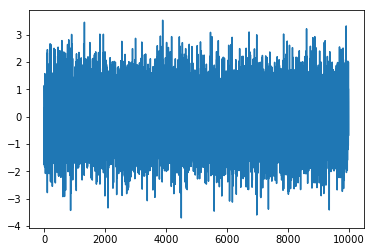

In [288]:
# Generate and plot a stationary series using the built-in command

stationary = np.random.randn(tlength)
plt.plot(stationary)
plt.show()

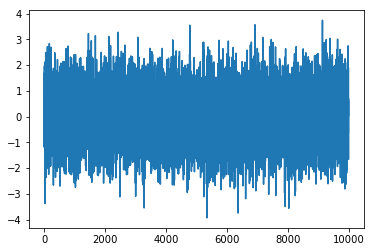

In [289]:
# Generate and plot a stationary series using a loop

holder = [] 

for i in range(tlength):
    e = np.random.randn()
    holder.append(e)

plt.plot(holder)
plt.show()

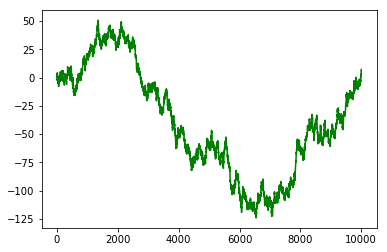

In [290]:
# Generate and plot a non-stationary series using a loop

holder = [] 

for i in range(tlength):
    if i == 0:  # generates a random observation for the first period
        b = np.random.randn()
        holder.append(b)    
    else: # adds a new random number to the past observations for subsequent observations
        e = np.random.randn()
        b = holder[i-1] + e
        holder.append(b)

plt.plot(holder, 'green')
plt.show()

In [291]:
# Generalize non-stationary as a program

def nonstationary(n):
    holder = []
    for i in range(n):
        if i == 0:
            b = np.random.randn()
            holder.append(b)    
        else:
            e = np.random.randn()
            b = holder[i-1] + e
            holder.append(b)
    return holder

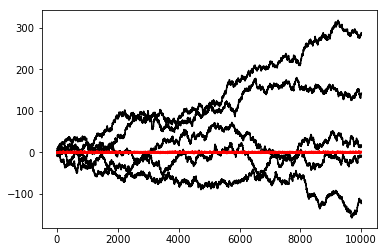

In [292]:
# Generate n nonstationary series and compare them to a stationary series

matrix = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = nonstationary(tlength)
    matrix[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrix[:,i], 'black')

plt.plot(stationary, 'red')
    
plt.show()

In [293]:
# Generalize stationary series generators as a program

def arstationary(n,alpha):
    if alpha >= 1:
        print("Alpha needs to be smaller than one")
    else:
        holder = []
        for i in range(n):
            if i == 0:
                b = np.random.randn()
                holder.append(b)    
            else:
                e = np.random.randn()
                b = alpha * holder[i-1] + e
                holder.append(b)
        return holder

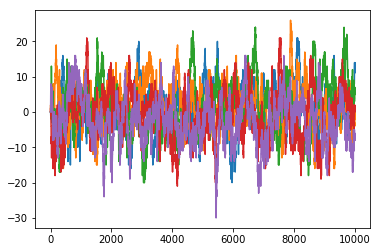

In [294]:
# Generate n nonstationary series and compare them to a stationary series

matrix = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = arstationary(tlength,0.99)
    matrix[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrix[:,i])
    
plt.show()